In [69]:
# imported required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [70]:
df = pd.read_csv(r'D:\ML\Machine_Learning\Data sets\spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
# check for shape
df.shape

(5572, 2)

## Data Cleaning

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [73]:
# check for null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [74]:
# check for duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [75]:
# encoding target col

encoder = LabelEncoder()

df['Category'] = encoder.fit_transform(df['Category'])

df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [76]:
df['Category'].value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

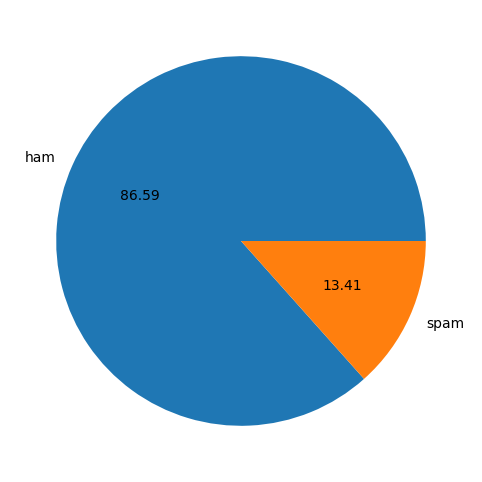

In [77]:
plt.figure(figsize=(8,6))
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [78]:
import nltk

In [79]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [80]:
df['num_characters'] = df['Message'].apply(len)

In [81]:
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [82]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [83]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [84]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.368988,18.826992,2.004666
std,59.926946,13.853616,1.539516
min,2.000000,1.000000,1.000000
25%,35.750000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [85]:
# ham
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.448290,17.425699,1.846010
std,58.434864,14.118631,1.475377
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [86]:
# spam
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,137.989290,27.878179,3.029451
std,29.980287,7.036282,1.552198
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


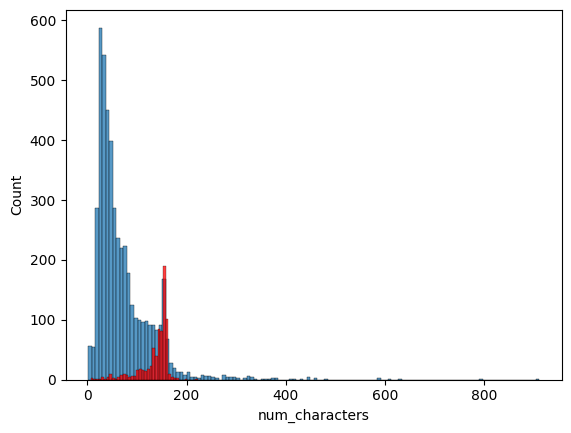

In [87]:
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'],color='red')
plt.show()

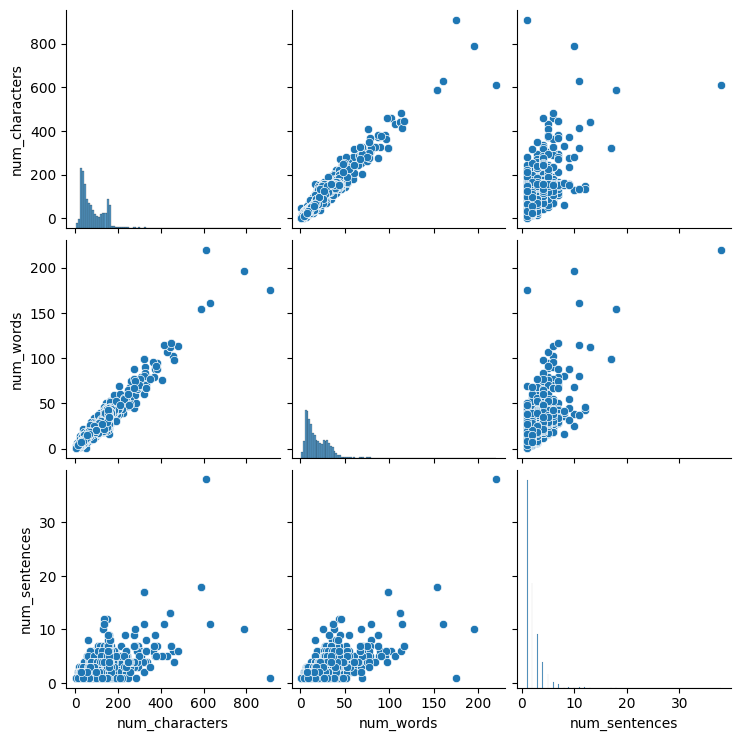

In [88]:
sns.pairplot(df[['num_characters','num_words','num_sentences']])

## Data Preprocessing

In [89]:
# nltk.download('stopwords')

In [90]:
def transform_msgs(msg):
    # converting text into lower
    msg = msg.lower()

    # word tokenizing, split the words
    msg = nltk.word_tokenize(msg)

    # removing special characters
    y = []
    for i in msg:
        if i.isalnum():
            y.append(i)

    msg = y[:]
    y.clear()

    # removing stopwords and punctuation
    for i in msg:
        if i not in stopwords.words('english'):
            y.append(i)

    msg = y[:]
    y.clear()

    # stemming the words
    ps = PorterStemmer()
    for i in msg:
        y.append(ps.stem(i))
        
    return " ".join(msg)

In [91]:
transform_msgs('hi how are you guys')

'hi guys'

In [ ]:
df['transformed_messages'] = df['Message'].apply(transform_msgs)

## Model Building 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000,lowercase=True,stop_words='english')
# max_features=3000

In [ ]:
X = tfidf.fit_transform(df['transformed_messages']).toarray()

In [ ]:
X.shape

In [ ]:
y = df['Category']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [99]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8475336322869955
[[815 142]
 [ 28 130]]
0.47794117647058826


In [100]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9695067264573991
[[957   0]
 [ 34 124]]
1.0


In [101]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9766816143497757
[[955   2]
 [ 24 134]]
0.9852941176470589


In [187]:
import pickle

In [188]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))